In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    

    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    # ==================================================================
    return J


In [3]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [5]:
import pandas as pd
from sklearn import preprocessing

data = pd.read_csv('C:/Users/20106/Desktop/scripts/Assignment1/house_prices_data_training_data.csv')

data.dropna(inplace=True)

#applying random samples shuffling with this line :
#data = data.sample(frac = 1)

data.corr()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.015349,0.002968,0.004132,-0.011647,-0.134774,0.015786,-0.002179,0.012762,-0.020641,0.006744,-0.011529,-0.002734,0.021260,-0.020168,-0.010725,-0.004442,0.011044,-0.011673,-0.144172
price,-0.015349,1.000000,0.302998,0.523706,0.701492,0.088863,0.280903,0.275296,0.403321,0.047493,0.662583,0.604963,0.324877,0.036774,0.137104,-0.042484,0.309013,0.011829,0.599256,0.078733
bedrooms,0.002968,0.302998,1.000000,0.518975,0.563960,0.029706,0.208355,-0.000120,0.084015,0.032531,0.357633,0.457610,0.312698,0.162714,0.023341,-0.139447,0.002399,0.110804,0.373918,0.026047
bathrooms,0.004132,0.523706,0.518975,1.000000,0.761185,0.092881,0.503779,0.075441,0.202049,-0.093526,0.659452,0.684892,0.301539,0.484680,0.069777,-0.202740,0.024802,0.221787,0.578656,0.093108
sqft_living,-0.011647,0.701492,0.563960,0.761185,1.000000,0.171436,0.400094,0.115717,0.294186,-0.047880,0.767729,0.867604,0.453788,0.324299,0.068040,-0.179350,0.062952,0.217911,0.752655,0.183090
sqft_lot,-0.134774,0.088863,0.029706,0.092881,0.171436,1.000000,0.022333,0.021800,0.069300,-0.019925,0.120176,0.187710,0.007957,0.082907,0.005654,-0.127868,-0.085148,0.229418,0.154483,0.701012
floors,0.015786,0.280903,0.208355,0.503779,0.400094,0.022333,1.000000,0.035147,0.053143,-0.220214,0.463205,0.579794,-0.235400,0.416793,0.034917,-0.080677,0.034106,0.163102,0.326940,0.018859
waterfront,-0.002179,0.275296,-0.000120,0.075441,0.115717,0.021800,0.035147,1.000000,0.401187,0.011109,0.089171,0.084253,0.081442,-0.016935,0.086466,0.033757,-0.014013,-0.044603,0.091463,0.030377
view,0.012762,0.403321,0.084015,0.202049,0.294186,0.069300,0.053143,0.401187,1.000000,0.038997,0.261069,0.178029,0.271859,-0.038771,0.103100,0.090166,0.004867,-0.084820,0.291409,0.066526
condition,-0.020641,0.047493,0.032531,-0.093526,-0.047880,-0.019925,-0.220214,0.011109,0.038997,1.000000,-0.125651,-0.145523,0.164615,-0.315515,-0.073901,-0.001262,-0.017790,-0.106673,-0.089569,-0.016417


In [35]:
X = data.drop(columns = ['date','id','zipcode','price','sqft_lot','condition','yr_built','yr_renovated','long','sqft_lot15'])
Y = data['price']


#applying different degrees on features 

X['sqft_living2'] = X['sqft_living']**2
X['sqft_above4'] = X['sqft_above']**3
X['sqft_living15_5'] = X['sqft_living15']**4
X['grade3'] = X['grade']**5
X['bathrooms6'] = X['bathrooms']**6


X.head(5)

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15,sqft_living2,sqft_above4,sqft_living15_5,grade3,bathrooms6
5191,3.0,2.50,2110.0,2.0,0.0,0.0,8.0,2110.0,0.0,47.3875,2110.0,4452100.0,9.393931e+09,1.982119e+13,32768.0,244.140625
2464,3.0,2.00,1210.0,1.0,0.0,0.0,7.0,1210.0,0.0,47.4705,1570.0,1464100.0,1.771561e+09,6.075732e+12,16807.0,64.000000
15071,3.0,1.75,1840.0,1.0,0.0,0.0,7.0,940.0,900.0,47.5800,1600.0,3385600.0,8.305840e+08,6.553600e+12,16807.0,28.722900
7028,3.0,2.50,2070.0,2.0,0.0,0.0,8.0,2070.0,0.0,47.5665,2220.0,4284900.0,8.869743e+09,2.428913e+13,32768.0,244.140625
5645,5.0,4.00,3460.0,2.0,0.0,0.0,10.0,2830.0,630.0,47.5201,1890.0,11971600.0,2.266519e+10,1.275990e+13,100000.0,4096.000000


In [36]:
Y = data['price']
X = data.drop(columns = ['price','date','id'])
X = X.to_numpy()
Y = Y.to_numpy()

# Normalization for the features
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma


# add coloumns of ones to be a bias
X = np.concatenate([np.ones((Y.size, 1)), X_norm], axis=1)

# 60% training set
X_train = X[0:10800,:]
Y_train =  Y[0:10800]
# 20% cross validation set
X_cross = X[10800:14400,:]
Y_cross = Y[10800:14400]

#20% testing set
X_test = X[14400:17999,:]
Y_test = Y[14400:17999]
X

array([[ 1.        , -0.38861039,  0.57789726, ...,  0.44642367,
         0.20316359, -0.3493489 ],
       [ 1.        , -0.38861039, -0.08120186, ...,  3.31421576,
        -0.59901337,  0.07596357],
       [ 1.        , -0.38861039, -0.41075142, ..., -1.2713766 ,
        -0.55444799, -0.33004477],
       ...,
       [ 1.        , -0.38861039,  0.57789726, ..., -1.24262681,
        -0.98524673, -0.40755379],
       [ 1.        , -0.38861039,  1.23699638, ..., -1.32168874,
         0.85678927, -0.20789494],
       [ 1.        ,  0.68204604,  0.90744682, ...,  0.94235764,
         0.3071495 ,  0.68068017]])

theta computed from gradient descent: [531274.08007202 -27897.73092402  32285.40357536  78166.33979538
   2515.6731897     745.53411687  52663.62696328  42139.64305728
  18635.56817379 120337.31657609  73428.26159594  25416.07061146
 -82761.54240655   4057.23800627 -31195.37402436  81180.15016357
 -21503.43382627]


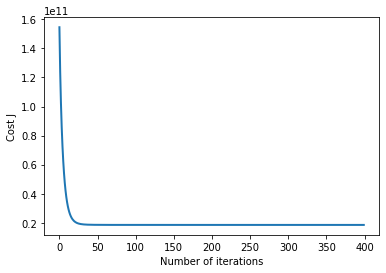

In [56]:
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# Training models with different degrees from 1 to 6

# init theta and run gradient descent
theta = np.zeros(X_train[:,0:17].shape[1])

theta, J_history = gradientDescentMulti(X_train[:,0:17], Y_train, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))


In [57]:
computeCostMulti(X_cross[:,0:17],Y_cross,theta)

26927211278.592083

In [58]:
computeCostMulti(X_test[:,0:17],Y_test,theta)

17777734990.318657

In [48]:
np.dot(X_test[10:15,0:14], theta)

array([ 462390.87806468, 1103136.58118963,  995830.28071605,
        496289.41231087,  740477.07778577])

In [49]:
Y_test[10:15]

array([342500., 868700., 884250., 495000., 450000.])

In [18]:
#K-fold

# K will be set to 5 
#so we will divide the dataset to 5 sample sets 

S1 = X[0:3600,:]
S2 = X[3600:7200,:]
S3 = X[7200:10800,:]
S4 = X[10800:14400,:]
S5 = X[14400:18000,:]

theta computed from gradient descent: [530267.89302058 -18822.46711488  39177.20956696  56689.66427538
   6095.01586102   6923.75583704  34027.43888696  47486.67453691
  26401.50760826 103536.55403346  53079.35514439  18744.75262757
 -75890.46925776   4881.96584167 -29002.06174351  83716.13122268
 -27406.50090355  41924.56708605  -8390.04399887]


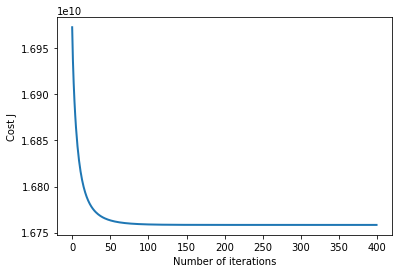

In [19]:
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# Training the model with 4 samples of the dataset and testing on 1 sample

# init theta and run gradient descent
theta = np.zeros(S1.shape[1])

theta1,J_history1 = gradientDescentMulti(S2, Y[3600:7200], theta, alpha, num_iters)
theta2,J_history2 = gradientDescentMulti(S3, Y[7200:10800], theta1, alpha, num_iters)
theta3,J_history3 = gradientDescentMulti(S4, Y[10800:14400], theta2, alpha, num_iters)
theta4,J_history4 = gradientDescentMulti(S5, Y[14400:18000], theta3, alpha, num_iters)


# Plot the convergence graph
pyplot.plot(np.arange(len(J_history4)), J_history4, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta4)))


# saving the last values of theta to be used in the next training iteration
theta=theta4

In [21]:
print('the test sample cost = ', computeCostMulti(S1,Y[0:3600],theta4))

the test sample cost =  21184492468.779766


In [24]:
## Regularization

## Creating Regularization functions

def gradientDescentRegularization(X, y, theta, alpha, num_iters,lambda_):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):

        theta = theta - (alpha / m) * (((np.dot(X, theta) - y).dot(X)) + (lambda_*theta))
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

def computeCostRegularization(X, y, theta,lambda_):
    
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0        
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y)) + ((lambda_/2*m)*np.sum(np.square(theta)))
    return J


In [30]:
# training each model of different degrees from 1 to 6 with all the set of lambdas

lambda_ = [0,0.01,0.05,0.1,0.5,1,5,10]

for i in range(len(lambda_)):
    
    theta = np.zeros(X_train[:,0:17].shape[1])

    theta, J_history = gradientDescentRegularization(X_train[:,0:17], Y_train, theta, alpha, num_iters,lambda_[i])
    
    print(computeCostRegularization(X_cross[:,0:17],Y_cross,theta,lambda_[i]))

18937756247.515877
6077063518959.113
30309337291646.06
60599163639835.836
302897141323682.6
605718038452755.8
3026223819932054.0
6046710316890518.0
